# Import packages

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load and read the data

In [67]:
data = pd.read_csv('cleaned_jartest1.csv')
data = data.drop(columns=['Date'])
data.head()

,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity,PH,Colour
0,90.4,7.07,500.0,2.5,0.4,0.5,19.0,7.07,48.0
1,90.4,7.07,500.0,3.0,0.4,0.5,14.2,7.05,39.0
2,90.4,7.07,500.0,3.5,0.4,0.5,12.6,7.02,31.0
3,90.4,7.07,500.0,4.0,0.4,0.5,10.6,6.98,27.0
4,90.4,7.07,500.0,4.5,0.4,0.5,10.7,6.93,29.0


In [68]:
# Drop rows with missing target values
data = data.dropna(subset=['Turbidity', 'PH', 'Colour'])
data.head()

,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity,PH,Colour
0,90.4,7.07,500.0,2.5,0.4,0.5,19.0,7.07,48.0
1,90.4,7.07,500.0,3.0,0.4,0.5,14.2,7.05,39.0
2,90.4,7.07,500.0,3.5,0.4,0.5,12.6,7.02,31.0
3,90.4,7.07,500.0,4.0,0.4,0.5,10.6,6.98,27.0
4,90.4,7.07,500.0,4.5,0.4,0.5,10.7,6.93,29.0


In [69]:
X_turbidity = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
X_ph = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
X_colour = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
y_turbidity = data['Turbidity']
y_ph = data['PH']
y_colour = data['Colour']

# Model development

## Turbidiy

In [70]:
X_turbidity_train, X_turbidity_test, y_turbidity_train, y_turbidity_test = train_test_split(X_turbidity, y_turbidity, test_size=0.2, random_state=42)

In [71]:
model_turbidity = RandomForestRegressor(
	n_estimators=200,
	min_samples_split=2,
	min_samples_leaf=1,
	max_features="sqrt",
	max_depth=None,
	bootstrap=False,
	random_state=42
)
model_turbidity.fit(X_turbidity_train, y_turbidity_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=200,
                      random_state=42)

## PH

In [72]:
X_ph_train, X_ph_test, y_ph_train, y_ph_test = train_test_split(X_ph, y_ph, test_size=0.2, random_state=42)

In [73]:
model_ph =  RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features="sqrt",
    max_depth=None,
    bootstrap=False,
    random_state=42
)

In [74]:
model_ph.fit(X_ph_train, y_ph_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=200, random_state=42)

## Colour

In [75]:
X_colour_train, X_colour_test, y_colour_train, y_colour_test = train_test_split(X_colour, y_colour, test_size=0.2, random_state=42)

In [76]:
model_colour = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="log2",
    max_depth=None,
    bootstrap=False,
    random_state=42
)

In [77]:
model_colour.fit(X_colour_train, y_colour_train)

RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=300,
                      random_state=42)

# Model Testing & Validation

In [78]:
y_turbidity_pred = model_turbidity.predict(X_turbidity_test)
y_turbidity_pred

array([ 3.6247  , 32.38    ,  9.99195 ,  8.63005 , 14.2385  , 11.05425 ,
       13.563   ,  5.17355 , 21.61245 , 15.92475 ,  7.5608  , 15.5715  ,
       15.10335 ,  7.77335 ,  7.55965 , 11.7777  , 24.78275 , 21.2935  ,
       13.7071  , 12.4798  ,  7.14745 , 19.449   , 12.091   ,  1.9714  ,
       12.21125 ,  5.07325 , 14.8455  , 12.4035  , 15.2565  ,  7.58155 ,
       15.29475 , 18.06515 , 16.43755 , 17.60045 ,  3.30825 , 29.2135  ,
        3.69165 , 26.6945  , 13.1623  ,  6.07385 , 60.199   , 22.2315  ,
       13.74975 , 31.5385  , 15.6983  ,  2.18055 , 19.7495  , 14.6     ,
       15.4023  , 47.282   ,  6.3382  , 18.41645 , 35.99255 ,  5.758   ,
        9.1132  , 12.88845 ,  8.85    , 25.74    , 16.5451  ,  2.75675 ,
       14.045   , 18.0419  , 19.27605 , 11.0261  , 23.23725 , 11.874   ,
       32.5713  , 18.8895  , 12.6214  ,  8.2211  , 11.63585 , 48.2568  ,
       21.1465  , 14.646   , 14.1079  , 33.32475 , 18.09155 , 23.60785 ,
       14.89835 , 14.0135  , 10.95915 ,  5.8516  , 

In [79]:
results_Tur = pd.DataFrame({
    'Actual': y_turbidity_test.flatten() if hasattr(y_turbidity_test, 'flatten') else y_turbidity_test,
    'Predicted': y_turbidity_pred.flatten() if hasattr(y_turbidity_pred, 'flatten') else y_turbidity_pred
})


results_Tur

,Actual,Predicted
3881,1.92,3.62470
1684,30.20,32.38000
1044,8.12,9.99195
4810,15.80,8.63005
1538,15.20,14.23850
...,...,...
2559,12.60,12.13995
1507,17.70,16.82675
1126,16.80,19.07060
180,18.00,12.95050


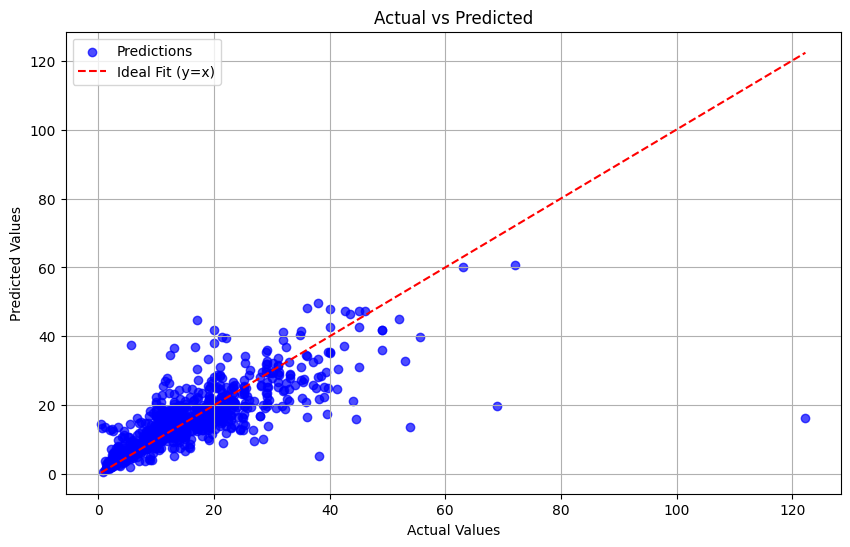

In [80]:
import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Tur['Actual'], results_Tur['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Tur['Actual'].min(), results_Tur['Predicted'].min())
max_val = max(results_Tur['Actual'].max(), results_Tur['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()

In [81]:
y_ph_pred = model_ph.predict(X_ph_test)
y_ph_pred

array([7.47009792, 6.811825  , 6.90850583, 7.52245167, 6.8938475 ,
       6.9084875 , 6.94569167, 7.45413524, 7.41375472, 7.5361875 ,
       7.49214944, 6.95213528, 7.10271083, 7.47819083, 7.41945992,
       6.91048891, 7.0457125 , 6.96363939, 7.0689225 , 7.52056917,
       7.50902417, 6.88905735, 7.19867917, 7.51376548, 7.7179125 ,
       7.45638542, 7.47882083, 6.98549464, 6.80072   , 7.4021175 ,
       7.06815833, 6.860105  , 6.72201429, 7.55339798, 7.50095694,
       6.94685967, 7.49640274, 6.92441488, 6.87374738, 7.42641405,
       6.88069807, 6.72695946, 7.29139792, 6.92213524, 7.03357652,
       7.53605   , 6.9546675 , 7.08027405, 6.89177802, 6.87874524,
       7.37582917, 6.8929725 , 6.87024117, 7.5264506 , 6.90870833,
       6.89620979, 7.31381667, 6.98578333, 6.8433752 , 7.46658667,
       7.11499643, 6.86078333, 7.55123536, 6.93632625, 6.93044808,
       6.970815  , 6.83226752, 7.00324583, 7.36100917, 7.57587911,
       6.79030833, 6.97259167, 6.92520833, 6.91895714, 6.93818

In [82]:
results_Ph = pd.DataFrame({
    'Actual': y_ph_test.flatten() if hasattr(y_ph_test, 'flatten') else y_ph_test,
    'Predicted': y_ph_pred.flatten() if hasattr(y_ph_pred, 'flatten') else y_ph_pred
})

results_Ph

,Actual,Predicted
3881,7.46,7.470098
1684,6.72,6.811825
1044,6.96,6.908506
4810,7.49,7.522452
1538,6.92,6.893847
...,...,...
2559,6.99,7.031921
1507,6.87,6.879429
1126,6.80,6.814277
180,6.98,7.015562


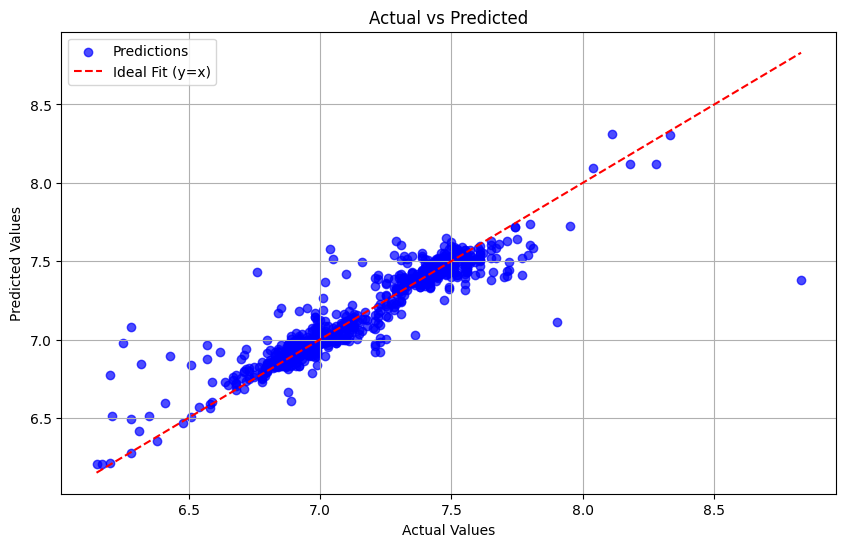

In [83]:
import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Ph['Actual'], results_Ph['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Ph['Actual'].min(), results_Ph['Predicted'].min())
max_val = max(results_Ph['Actual'].max(), results_Ph['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [84]:
y_colour_pred = model_colour.predict(X_colour_test)
y_colour_pred

array([ 12.3       ,  41.77      ,  12.97      ,  60.21333333,
        25.62666667,  11.66      ,  32.39333333,  19.88333333,
        27.37      ,  27.44333333,  15.96333333,  37.12666667,
        25.07      ,  12.59      ,  16.02333333,  39.15      ,
        54.65666667,  53.02      ,  52.78333333, 156.32      ,
       117.17333333,  43.66      ,  21.08333333,  11.17666667,
       161.49333333,  45.59333333,  18.75666667,  26.2       ,
        27.35666667,  13.25333333,  30.10333333,  29.8       ,
        19.51333333, 145.311     ,  12.43666667, 113.11333333,
        44.98666667,  41.25      ,  37.765     ,  14.61666667,
        65.37333333,  29.75      ,  23.92333333,  65.35333333,
        35.28666667,  30.97666667,  39.20666667,  54.10666667,
        42.65333333,  69.1       ,  12.23666667,  62.11666667,
        78.90333333,  76.76      ,  11.        ,  39.96333333,
        23.        ,  42.38333333,  25.88333333,  18.73      ,
        21.34666667,  98.97      , 144.37      ,  20.90

In [85]:
results_Colo = pd.DataFrame({
    'Actual': y_colour_test.flatten() if hasattr(y_colour_test, 'flatten') else y_colour_test,
    'Predicted': y_colour_pred.flatten() if hasattr(y_colour_pred, 'flatten') else y_colour_pred
})

results_Colo

,Actual,Predicted
3881,12.0,12.300000
1684,28.0,41.770000
1044,12.0,12.970000
4810,30.0,60.213333
1538,26.0,25.626667
...,...,...
2559,31.0,31.886667
1507,31.0,23.926667
1126,21.0,27.890000
180,31.0,19.860000


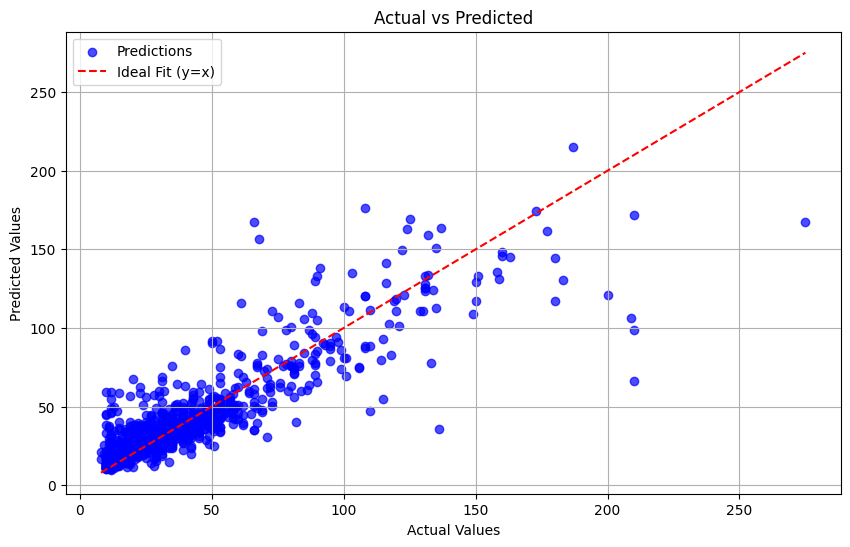

In [86]:
import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Colo['Actual'], results_Colo['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Colo['Actual'].min(), results_Colo['Predicted'].min())
max_val = max(results_Colo['Actual'].max(), results_Colo['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, y_pred, target_name):
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Convert R² to percentage
    print(f"\nEvaluation Metrics for {target_name}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R-squared (R²): {r2:.2f}")


evaluate_model(y_turbidity_test, y_turbidity_pred, "Turbidity")
evaluate_model(y_ph_test, y_ph_pred, "PH")
evaluate_model(y_colour_test, y_colour_pred, "Colour")



Evaluation Metrics for Turbidity:
Mean Absolute Error (MAE): 3.78
R-squared (R²): 0.58

Evaluation Metrics for PH:
Mean Absolute Error (MAE): 0.06
R-squared (R²): 0.87

Evaluation Metrics for Colour:
Mean Absolute Error (MAE): 9.58
R-squared (R²): 0.77
